# GAN
## Setup
### Imports

In [7]:
from keras.callbacks import *
import tensorflow as tf
import matplotlib.pyplot as plt

from settings import *
from GANModel import GANModel
from SaveImagesCallback import SaveImagesCallback
from SaveModelCallback import SaveModelCallback

### Check GPU

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
	try:
		tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
		print('Using GPU :)')
	except RuntimeError as e:
		print(e)
else:
	print('Using CPU :(')

Using GPU :)


## Dataset Initialization

### Create dataset from directory

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
	DATASET_PATH,
	image_size=(IMAGE_SIZE, IMAGE_SIZE),
	batch_size=None,
	shuffle=True,
	seed=SEED,
	interpolation='bilinear',
	label_mode=None
)

flipped_dataset = dataset.map(tf.image.flip_left_right, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.concatenate(flipped_dataset)
dataset = dataset.map(lambda x: x / 255 * 2 - 1, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True).shuffle(BUFFER_SIZE)

Found 40603 files belonging to 1 classes.


### Visualise data

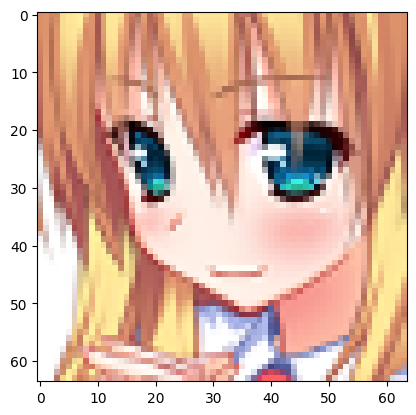

In [10]:
for image in dataset.take(1):
	plt.imshow((image[0] + 1) / 2)

## Model Initialization
### Load GAN

In [11]:
gan = GANModel()
gan.compile()

### Train the model

In [12]:
save_images_callback = SaveImagesCallback()
save_model_callback = SaveModelCallback()
gan.fit(dataset, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=True, callbacks=[save_images_callback, save_model_callback])

Epoch 1/300
2537/2537 [==============================] - 103s 38ms/step - generator_loss: 2.1671 - discriminator_loss: 0.4733
Epoch 2/300
2537/2537 [==============================] - 99s 37ms/step - generator_loss: 2.3181 - discriminator_loss: 0.4511
Epoch 3/300
2537/2537 [==============================] - 99s 37ms/step - generator_loss: 1.8212 - discriminator_loss: 0.4935
Epoch 4/300
2537/2537 [==============================] - 98s 37ms/step - generator_loss: 1.7814 - discriminator_loss: 0.4919
Epoch 5/300
2537/2537 [==============================] - 99s 37ms/step - generator_loss: 1.8662 - discriminator_loss: 0.4717
Epoch 6/300
2537/2537 [==============================] - 99s 38ms/step - generator_loss: 1.9652 - discriminator_loss: 0.4537
Epoch 7/300
2537/2537 [==============================] - 95s 36ms/step - generator_loss: 2.0570 - discriminator_loss: 0.4364
Epoch 8/300
2537/2537 [==============================] - 99s 38ms/step - generator_loss: 2.0842 - discriminator_loss: 0.4306

KeyboardInterrupt: 

### Generate images

1/1 [==============================] - 0s 74ms/step


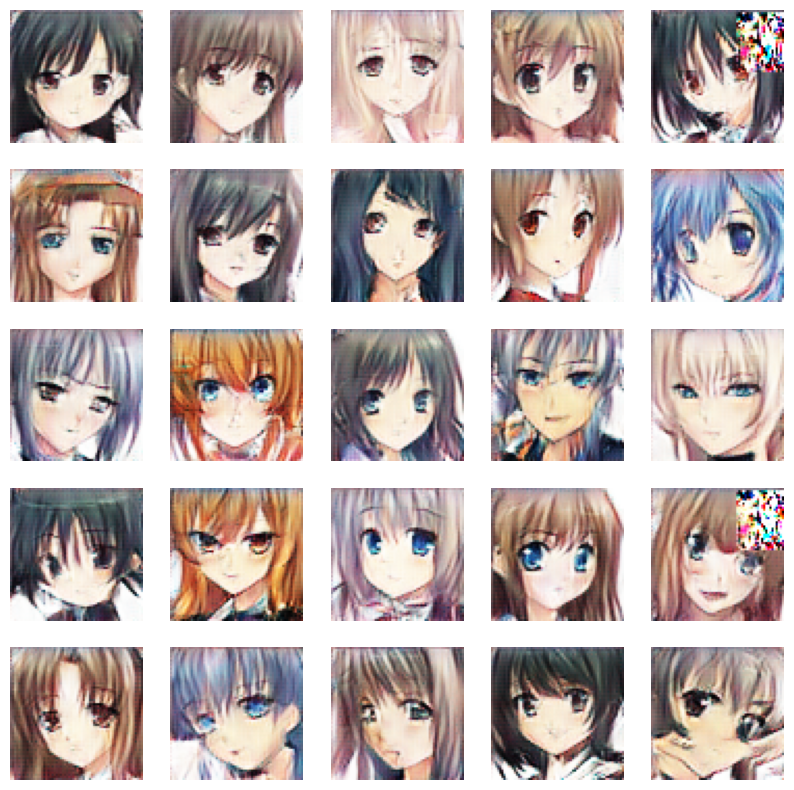

In [ ]:
saved_generator = tf.keras.models.load_model(MODEL_OUTPUT_PATH + '/generator.h5')

def plot_images(images):
	plt.figure(figsize=(10, 10))
	for i in range(images.shape[0]):
		plt.subplot(5, 5, i + 1)
		plt.imshow(images[i, :, :, :])
		plt.axis('off')
	plt.show()

noise = tf.random.normal((25, 128))
images = (saved_generator.predict(noise) + 1) / 2
plot_images(images)